=== Демонстрация базового FFT ===


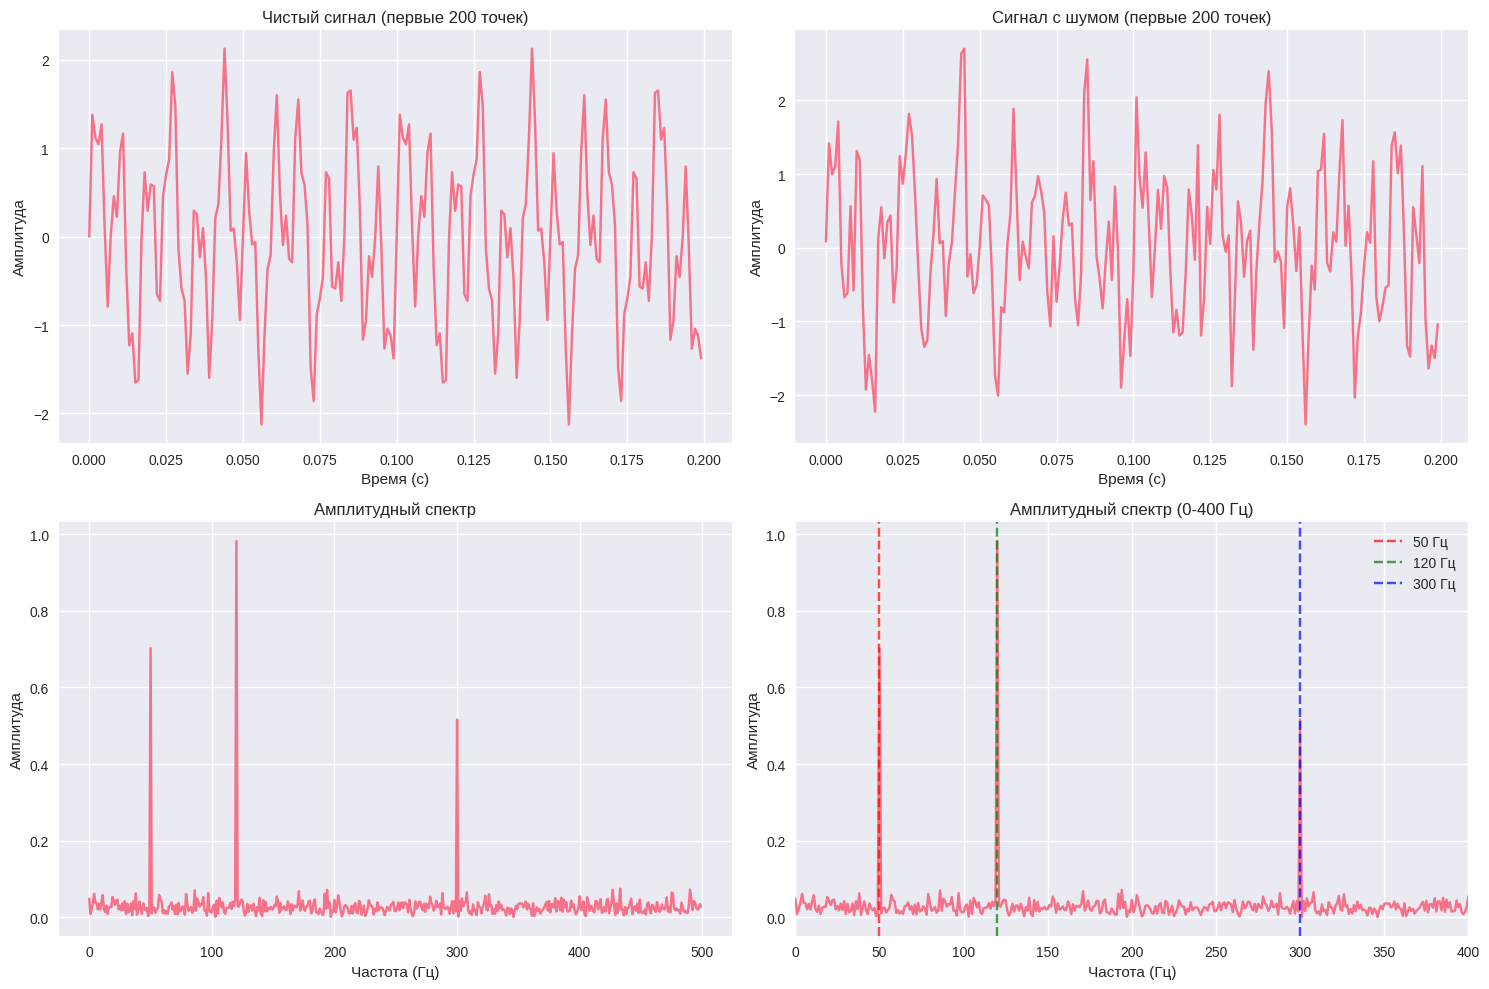


=== Демонстрация фильтрации FFT ===


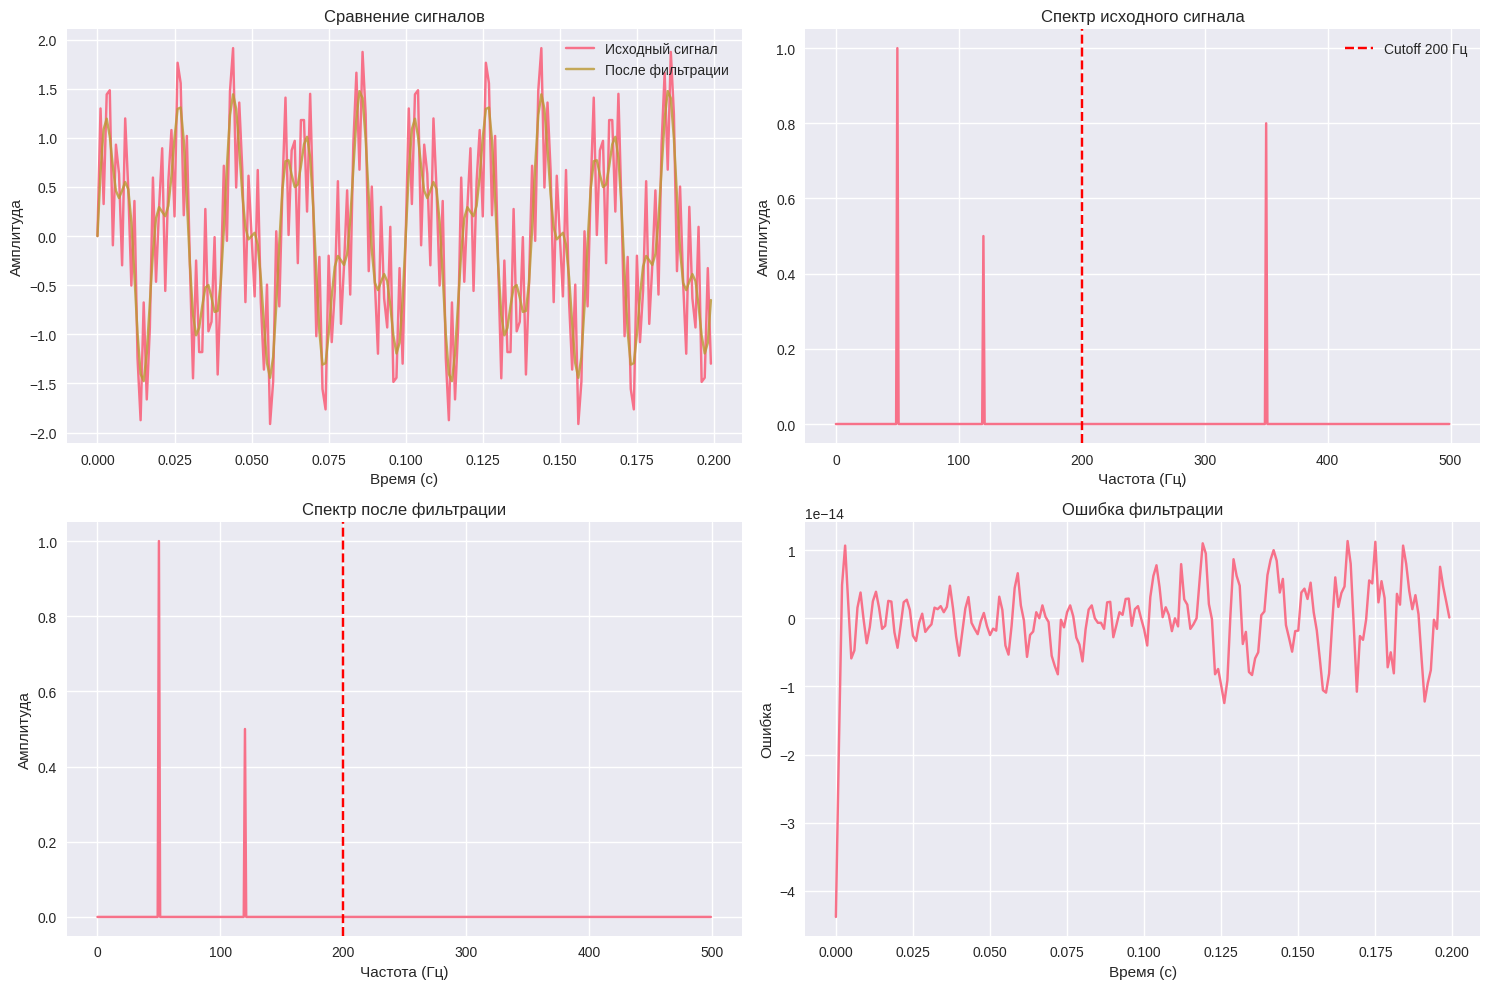


=== Демонстрация 2D FFT ===


AttributeError: 'uarray._Function' object has no attribute 'fft2'

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, ifft
import seaborn as sns

# Настройка стиля графиков
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

def demonstrate_fft_basic():
    """
    Базовая демонстрация FFT на простом сигнале
    """
    # Параметры сигнала
    Fs = 1000  # Частота дискретизации
    T = 1.0   # Длительность сигнала
    t = np.linspace(0, T, int(Fs * T), endpoint=False)

    # Создаем сложный сигнал из трех синусоид
    f1, f2, f3 = 50, 120, 300  # Частоты в Гц
    signal = (0.7 * np.sin(2 * np.pi * f1 * t) +
              1.0 * np.sin(2 * np.pi * f2 * t) +
              0.5 * np.sin(2 * np.pi * f3 * t))

    # Добавляем шум
    noise = 0.5 * np.random.normal(0, 1, len(t))
    signal_with_noise = signal + noise

    # Вычисляем FFT
    fft_result = fft(signal_with_noise)
    frequencies = fftfreq(len(fft_result), 1/Fs)

    # Амплитудный спектр
    amplitude_spectrum = 2.0/len(signal_with_noise) * np.abs(fft_result)

    # Визуализация
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # Исходный чистый сигнал
    axes[0, 0].plot(t[:200], signal[:200])
    axes[0, 0].set_title('Чистый сигнал (первые 200 точек)')
    axes[0, 0].set_xlabel('Время (с)')
    axes[0, 0].set_ylabel('Амплитуда')
    axes[0, 0].grid(True)

    # Сигнал с шумом
    axes[0, 1].plot(t[:200], signal_with_noise[:200])
    axes[0, 1].set_title('Сигнал с шумом (первые 200 точек)')
    axes[0, 1].set_xlabel('Время (с)')
    axes[0, 1].set_ylabel('Амплитуда')
    axes[0, 1].grid(True)

    # Амплитудный спектр (полный)
    axes[1, 0].plot(frequencies[:len(frequencies)//2],
                   amplitude_spectrum[:len(amplitude_spectrum)//2])
    axes[1, 0].set_title('Амплитудный спектр')
    axes[1, 0].set_xlabel('Частота (Гц)')
    axes[1, 0].set_ylabel('Амплитуда')
    axes[1, 0].grid(True)

    # Амплитудный спектр (увеличенный)
    axes[1, 1].plot(frequencies[:len(frequencies)//2],
                   amplitude_spectrum[:len(amplitude_spectrum)//2])
    axes[1, 1].set_title('Амплитудный спектр (0-400 Гц)')
    axes[1, 1].set_xlabel('Частота (Гц)')
    axes[1, 1].set_ylabel('Амплитуда')
    axes[1, 1].set_xlim(0, 400)
    axes[1, 1].grid(True)

    # Отмечаем пики частот
    for freq, color in zip([f1, f2, f3], ['red', 'green', 'blue']):
        axes[1, 1].axvline(x=freq, color=color, linestyle='--', alpha=0.7,
                          label=f'{freq} Гц')
    axes[1, 1].legend()

    plt.tight_layout()
    plt.show()

    return signal_with_noise, fft_result, frequencies

def fft_filtering_demo():
    """
    Демонстрация фильтрации сигнала с помощью FFT
    """
    # Создаем сигнал
    Fs = 1000
    t = np.linspace(0, 1, Fs, endpoint=False)

    # Полезный сигнал + высокочастотный шум
    useful_signal = np.sin(2 * np.pi * 50 * t) + 0.5 * np.sin(2 * np.pi * 120 * t)
    high_freq_noise = 0.8 * np.sin(2 * np.pi * 350 * t)
    signal = useful_signal + high_freq_noise

    # FFT анализа
    fft_signal = fft(signal)
    frequencies = fftfreq(len(fft_signal), 1/Fs)

    # Создаем фильтр низких частот
    cutoff_freq = 200  # Гц
    filter_mask = np.abs(frequencies) < cutoff_freq

    # Применяем фильтр
    fft_filtered = fft_signal * filter_mask

    # Обратное FFT
    filtered_signal = np.real(ifft(fft_filtered))

    # Визуализация
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # Исходный и отфильтрованный сигнал
    axes[0, 0].plot(t[:200], signal[:200], label='Исходный сигнал')
    axes[0, 0].plot(t[:200], filtered_signal[:200], label='После фильтрации', alpha=0.8)
    axes[0, 0].set_title('Сравнение сигналов')
    axes[0, 0].set_xlabel('Время (с)')
    axes[0, 0].set_ylabel('Амплитуда')
    axes[0, 0].legend()
    axes[0, 0].grid(True)

    # Спектр исходного сигнала
    amplitude_original = 2.0/len(signal) * np.abs(fft_signal)
    axes[0, 1].plot(frequencies[:len(frequencies)//2],
                   amplitude_original[:len(amplitude_original)//2])
    axes[0, 1].set_title('Спектр исходного сигнала')
    axes[0, 1].set_xlabel('Частота (Гц)')
    axes[0, 1].set_ylabel('Амплитуда')
    axes[0, 1].axvline(x=cutoff_freq, color='red', linestyle='--', label=f'Cutoff {cutoff_freq} Гц')
    axes[0, 1].legend()
    axes[0, 1].grid(True)

    # Спектр после фильтрации
    amplitude_filtered = 2.0/len(filtered_signal) * np.abs(fft_filtered)
    axes[1, 0].plot(frequencies[:len(frequencies)//2],
                   amplitude_filtered[:len(amplitude_filtered)//2])
    axes[1, 0].set_title('Спектр после фильтрации')
    axes[1, 0].set_xlabel('Частота (Гц)')
    axes[1, 0].set_ylabel('Амплитуда')
    axes[1, 0].axvline(x=cutoff_freq, color='red', linestyle='--')
    axes[1, 0].grid(True)

    # Ошибка фильтрации
    error = useful_signal - filtered_signal
    axes[1, 1].plot(t[:200], error[:200])
    axes[1, 1].set_title('Ошибка фильтрации')
    axes[1, 1].set_xlabel('Время (с)')
    axes[1, 1].set_ylabel('Ошибка')
    axes[1, 1].grid(True)

    plt.tight_layout()
    plt.show()

    return signal, filtered_signal, error

def fft_2d_demo():
    """
    Демонстрация 2D FFT для обработки изображений
    """
    # Создаем тестовое изображение с периодическими паттернами
    x = np.linspace(-5, 5, 256)
    y = np.linspace(-5, 5, 256)
    X, Y = np.meshgrid(x, y)

    # Изображение с синусоидальными паттернами
    image = (np.sin(10 * X) + np.cos(15 * Y) +
             0.5 * np.sin(25 * np.sqrt(X**2 + Y**2)))

    # Добавляем шум
    noise = 0.3 * np.random.normal(0, 1, image.shape)
    noisy_image = image + noise

    # 2D FFT
    fft_2d = fft.fft2(noisy_image)
    fft_shifted = fft.fftshift(fft_2d)  # Сдвигаем нулевую частоту в центр

    # Амплитудный спектр в логарифмической шкале
    magnitude_spectrum = np.log(1 + np.abs(fft_shifted))

    # Визуализация
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))

    # Исходное изображение
    im1 = axes[0, 0].imshow(image, cmap='viridis')
    axes[0, 0].set_title('Исходное изображение')
    plt.colorbar(im1, ax=axes[0, 0])

    # Зашумленное изображение
    im2 = axes[0, 1].imshow(noisy_image, cmap='viridis')
    axes[0, 1].set_title('Зашумленное изображение')
    plt.colorbar(im2, ax=axes[0, 1])

    # Амплитудный спектр
    im3 = axes[1, 0].imshow(magnitude_spectrum, cmap='hot')
    axes[1, 0].set_title('Амплитудный спектр (log scale)')
    plt.colorbar(im3, ax=axes[1, 0])

    # Фазовый спектр
    phase_spectrum = np.angle(fft_shifted)
    im4 = axes[1, 1].imshow(phase_spectrum, cmap='hsv')
    axes[1, 1].set_title('Фазовый спектр')
    plt.colorbar(im4, ax=axes[1, 1])

    plt.tight_layout()
    plt.show()

    return image, noisy_image, fft_shifted

def fft_performance_comparison():
    """
    Сравнение производительности FFT и наивного DFT
    """
    import time

    def naive_dft(x):
        """Наивная реализация DFT со сложностью O(N²)"""
        N = len(x)
        n = np.arange(N)
        k = n.reshape((N, 1))
        M = np.exp(-2j * np.pi * k * n / N)
        return np.dot(M, x)

    # Тестируем на разных размерах данных
    sizes = [64, 128, 256, 512, 1024]
    fft_times = []
    dft_times = []

    for size in sizes:
        # Генерируем тестовые данные
        data = np.random.random(size) + 1j * np.random.random(size)

        # Измеряем время FFT
        start = time.time()
        fft_result = fft(data)
        fft_time = time.time() - start
        fft_times.append(fft_time)

        # Измеряем время наивного DFT (только для небольших размеров)
        if size <= 512:
            start = time.time()
            dft_result = naive_dft(data)
            dft_time = time.time() - start
            dft_times.append(dft_time)
        else:
            dft_times.append(np.nan)

    # Визуализация производительности
    plt.figure(figsize=(10, 6))
    plt.plot(sizes[:len(dft_times)], dft_times, 'ro-', label='Naive DFT O(N²)', linewidth=2)
    plt.plot(sizes, fft_times, 'bo-', label='FFT O(N log N)', linewidth=2)
    plt.xlabel('Размер массива')
    plt.ylabel('Время выполнения (сек)')
    plt.title('Сравнение производительности FFT и DFT')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.yscale('log')
    plt.show()

    print("Сравнение времени выполнения:")
    for i, size in enumerate(sizes):
        if i < len(dft_times) and not np.isnan(dft_times[i]):
            speedup = dft_times[i] / fft_times[i] if fft_times[i] > 0 else float('inf')
            print(f"Размер {size}: DFT={dft_times[i]:.4f}с, FFT={fft_times[i]:.6f}с, ускорение: {speedup:.1f} раз")
        else:
            print(f"Размер {size}: FFT={fft_times[i]:.6f}с")

# Запуск всех демонстраций
if __name__ == "__main__":
    print("=== Демонстрация базового FFT ===")
    signal, fft_result, freqs = demonstrate_fft_basic()

    print("\n=== Демонстрация фильтрации FFT ===")
    original, filtered, error = fft_filtering_demo()

    print("\n=== Демонстрация 2D FFT ===")
    image, noisy_image, fft_2d = fft_2d_demo()

    print("\n=== Сравнение производительности ===")
    fft_performance_comparison()